In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sympy.physics.units as u
import sympy as sp
import numpy as np
import logging as log
import functools
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

import importlib.util
#spec = importlib.util.spec_from_file_location("miptlabs", "/full/path/to/miptlabs.py")
#miptlabs = importlib.util.module_from_spec(spec)
#spec.loader.exec_module(miptlabs)
#ml = miptlabs

import miptlabs as ml
importlib.reload(ml)

import sys, importlib
importlib.reload(log)
log.basicConfig(level=log.INFO, format='%(message)s', stream=sys.stdout)

In [3]:
def test_print_rounded(self):
    a = PQ(12345.6*u.m, sigma=3*u.m, dim=u.m)
    print(a.repr_rounded_as(u.m))
    b = PQ(12345.4*u.m, sigma=3*u.m, dim=u.m)
    print(b.repr_rounded_as(u.m))
    c = PQ(0.4*u.m, sigma=3*u.m, dim=u.m)
    print(c.repr_rounded_as(u.m))
    d = PQ(0.4*u.m, sigma=0.03*u.m, dim=u.m)
    print(d.repr_rounded_as(u.m))

In [4]:

a = ml.PQ(1*u.m, dim=u.meter, sigma=1*u.mm) # Почему meter/m не считается?
b = ml.PQ(2*u.m, sigma=1*u.mm)
c = ml.PQ(2*u.m, sigma=1*u.mm)
t = ml.PQ(2*u.s,  sigma=0.01*u.s)
try:
    test = ml.PQ(a, sigma=2*u.m)
except Exception:
    pass
arr = ml.pqarray([a, b, c])

print(a)
print(b)
print(c)
print(t)
# type(u.m)
# u.convert_to(a.sigma, a.dim)
print(a+b) #3.000000±0.001414 meter (0.000471)
print((a*3)) # 3.000000±0.003000 meter (0.001000)
print(a*b) # 2.000000±0.002236 meter**2 (0.001118)
print(a/b) # 0.500000±0.000559 1 (0.001118)
print((u.s/b).val) #Откуда берётся 2?
print(1/b) # 0.500000±0.000250 1/meter (0.000500)

# type(u.m.args[1])
print(arr)
print((arr-a)[0].dim)
print(a*2)

1.0000±0.0010 meter (0.10%)
2.0000±0.0010 meter (0.05%)
2.0000±0.0010 meter (0.05%)
2.000±0.010 second (0.50%)
3.0000±0.0014 meter (0.05%)
3.000±0.003 meter (0.10%)
2.0000±0.0022 meter**2 (0.11%)
0.5000±0.0006  (0.11%)
second/(2*meter)
0.5000±0.0002 1/meter (0.05%)
[1.0000±0.0010 meter (0.10%) 2.0000±0.0010 meter (0.05%)
 2.0000±0.0010 meter (0.05%)]
meter
2.0000±0.0020 meter (0.10%)


In [5]:
x = (u.s/b)
print(np.prod(np.array(sp.simplify((x.val/x.dim).n().n()).args)[1:]))
print(x.val/x.dim)
print((b/u.s).val)

second/(s*second)
second/(2*s*second)
derived_dim meter/(s*second) (second, Dimension(time, T), 1, s)
2*meter/second


<class 'numpy.float64'>


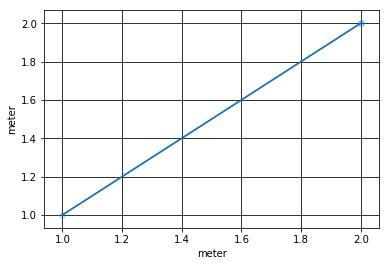

In [6]:
print(type(arr.val_float[0]))
ml.plt_pq(arr, arr)
